# Credit Fraud Detection Dashboard
using kaggle dataset

In [6]:
# Initial run to import and set data
import pandas, kagglehub

PATH = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", PATH)

Path to dataset files: /Users/benmorgan/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [7]:
# Create Panda DF

csv_path = PATH + '/creditcard.csv'
df = pandas.read_csv(csv_path)
print(df.head())
print(df["Class"].value_counts(normalize=True)*100)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

V1-V28 data has already been PCA'd so we need to carry out PCA on time and amount before any modelling

In [8]:
from sklearn.model_selection import train_test_split

x = df.drop("Class", axis=1)
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train[['Time','Amount']] = scaler.fit_transform(x_train[['Time','Amount']])
x_test[['Time','Amount']] = scaler.transform(x_test[['Time','Amount']])

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


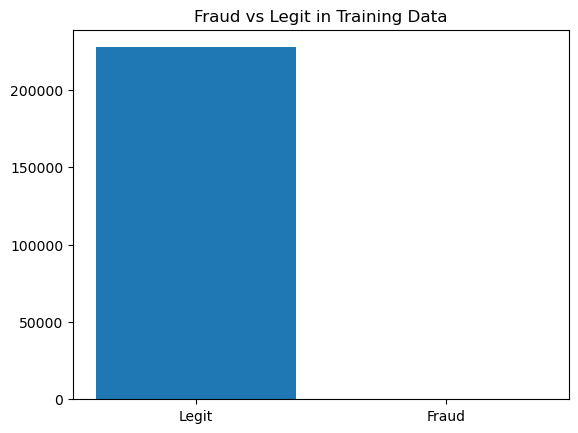

In [11]:
import matplotlib.pyplot as plt

print(y_train.value_counts(normalize=True))

plt.bar(['Legit','Fraud'], y_train.value_counts())
plt.title("Fraud vs Legit in Training Data")
plt.show()